## Apendizaje no supervisado (clustering)

In [20]:
import pandas as pd
import wikipedia # pip install wikipedia

In [3]:
articles = ['Data science', 'Artificial intelligence', 'European central bank', 'Bank', 'Financial technology', 'International monetary fund', 'Basketball', 'Swimming', 'History']

In [4]:
wiki_lst = []
title = []

for article in articles:
    print('Loading content: ', article)
    wiki_lst.append(wikipedia.page(article).content)
    title.append(article)

Loading content:  Data science
Loading content:  Artificial intelligence
Loading content:  European central bank
Loading content:  Bank
Loading content:  Financial technology
Loading content:  International monetary fund
Loading content:  Basketball
Loading content:  Swimming
Loading content:  History


In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words = {'english'})
X = vectorizer.fit_transform(wiki_lst)

print(vectorizer.get_feature_names()[-100:])
print(X.shape)
print(X[0,:])

['winter', 'wipo', 'wire', 'wireless', 'wisdom', 'wish', 'wisse', 'with', 'withdrawal', 'withdrew', 'withheld', 'within', 'without', 'witness', 'witnessed', 'wits', 'wjz', 'woman', 'women', 'won', 'wood', 'woods', 'woolcock', 'word', 'words', 'work', 'worked', 'workers', 'workforce', 'working', 'workout', 'works', 'workshop', 'workweek', 'world', 'worldwide', 'worry', 'worse', 'worsening', 'worth', 'worthless', 'would', 'wound', 'wounds', 'wp', 'wreaking', 'wrigley', 'write', 'writer', 'writes', 'writing', 'writings', 'written', 'wrong', 'wrote', 'wry', 'wto', 'wu', 'wwii', 'wynmann', 'xalapa', 'xdr', 'xi', 'xxvi', 'yanis', 'yankees', 'yards', 'yarn', 'yau', 'year', 'years', 'yet', 'yields', 'ymca', 'york', 'you', 'young', 'younger', 'youth', 'youtube', 'youtubes', 'yudkowsky', 'yuval', 'yves', 'zaire', 'zalta', 'zambia', 'zealand', 'zebra', 'zelenskyy', 'zemon', 'zero', 'zone', 'zones', 'zoning', 'zuckerberg', 'être', 'čapek', 'ἱστορία', 'ἵστωρ']
(9, 7787)
  (0, 5796)	0.00742122228383

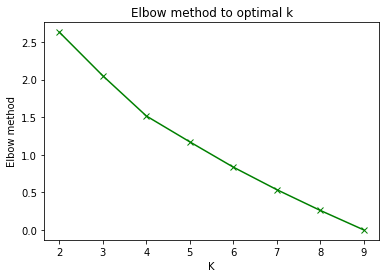

In [18]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

Sum_of_squared_distances = []
K = range(2, 10)

for k in K:
    km = KMeans(n_clusters = k, max_iter = 200, n_init = 10)
    km = km.fit(X)
    Sum_of_squared_distances.append(km.inertia_)

plt.plot(K, Sum_of_squared_distances, 'gx-')
plt.xlabel('K')
plt.ylabel('Elbow method')
plt.title('Elbow method to optimal k')

plt.show()



optimization with k=6

In [21]:
true_k = 6
model = KMeans(n_clusters = true_k, init = 'k-means++', max_iter = 200, n_init = 10)
model.fit(X)
labels = model.labels_
wiki_cl = pd.DataFrame(list(zip(title, labels)), columns = ['title', 'cluster'])
print(wiki_cl.sort_values(by = ['cluster']))

                         title  cluster
7                     Swimming        0
1      Artificial intelligence        1
8                      History        1
2        European central bank        2
3                         Bank        2
5  International monetary fund        2
4         Financial technology        3
6                   Basketball        4
0                 Data science        5


Cluster: 0
Title:


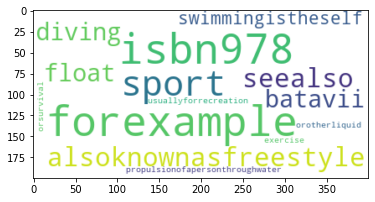

Cluster: 1
Title:


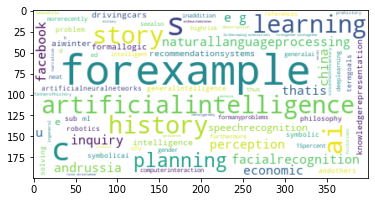

Cluster: 2
Title:


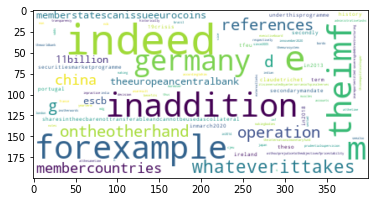

Cluster: 3
Title:


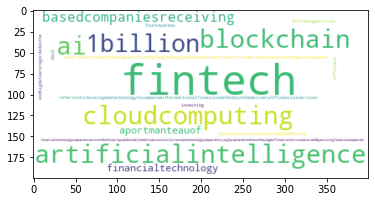

Cluster: 4
Title:


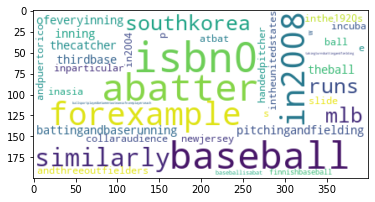

Cluster: 5
Title:


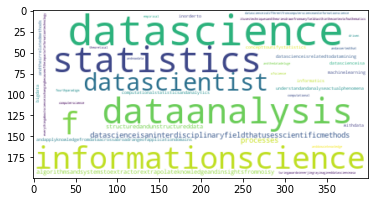

In [27]:
from wordcloud import WordCloud

result = {'cluster': labels, 'wikipedia': wiki_lst}
result = pd.DataFrame(result)

for k in range(0, true_k):
    s = result[result.cluster == k]
    text = s['wikipedia'].str.cat(sep = '')
    text = text.lower()
    text = ''.join([word for word in text.split()])
    wordcloud = WordCloud(max_font_size = 50, max_words = 100, background_color = 'white').generate(text)
    print('Cluster: {}'.format(k))
    print('Title:')
    titles = wiki_cl[wiki_cl.cluster == k]['title']
    
    plt.figure()
    plt.imshow(wordcloud, interpolation = 'bilinear')
    plt.show()

